In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import pandas as pd
from scipy.spatial.transform import Rotation as R

In [4]:
filepath = '/home/su/Dev/ORB_SLAM3/f_dataset-magpie-gt-mono-0.txt'
df = pd.read_csv(filepath, header=None, delimiter=" ", names=["t", "px", "py", "pz", "qx", "qy", "qz", "qw"])

t  = np.array((df['t'] - df['t'][0])*10e-9)
pos = df[["px", "py", "pz"]].to_numpy()
quat = df[["qx", "qy", "qz", "qw"]].to_numpy()

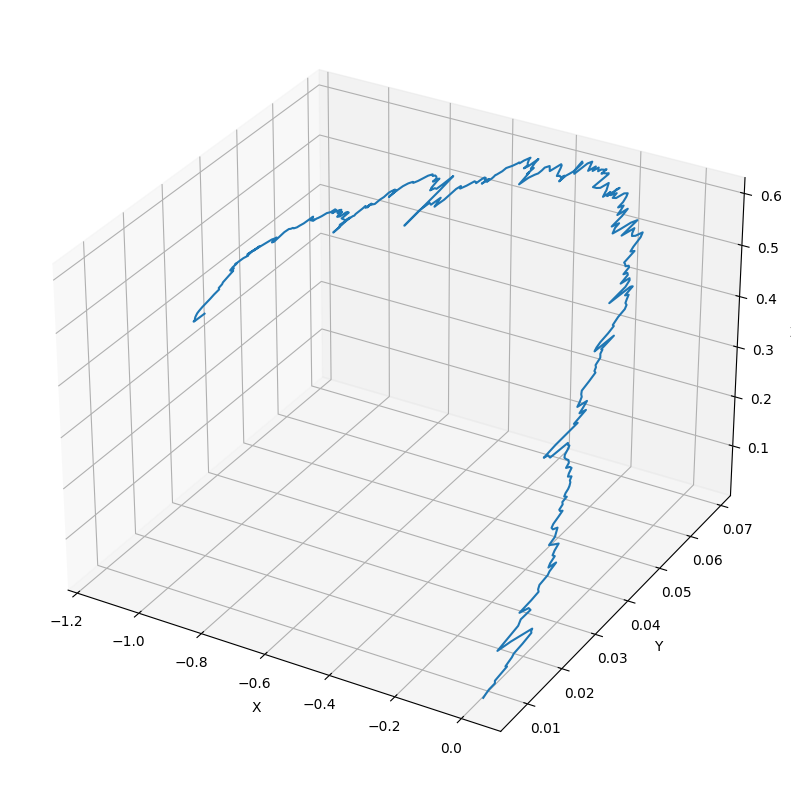

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot(pos[:,0], pos[:,1], pos[:,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.set_xlim([0, 2])  
# ax.set_ylim([0, 2])  
# ax.set_zlim([0, 2])  

plt.show()

In [66]:
def align_trajectories(file1, file2, rotation_matrix, translation_vector):
    # Load the trajectories
    traj1 = pd.read_csv(file1, delim_whitespace=True, header=None, names=["t", "px", "py", "pz", "qx", "qy", "qz", "qw"])
    traj2 = pd.read_csv(file2, delim_whitespace=True, header=None, names=["t", "px", "py", "pz", "qx", "qy", "qz", "qw"])
    
    # Extract positions from the second trajectory
    positions = traj2[["px", "py", "pz"]].to_numpy()
    
    # Apply the transformation
    aligned_positions = (rotation_matrix @ positions.T).T + translation_vector
    
    # Replace the positions in the second trajectory with the aligned positions
    traj2[["px", "py", "pz"]] = aligned_positions
       
    return traj1, traj2

gt1_file = "/home/su/attitude-estimation/MagPIE/dataset/Talbot_UGV/magpie2Dataset_1_gt.txt"
gt8_file = "/home/su/attitude-estimation/MagPIE/dataset/Talbot_UGV/magpie2Dataset_8_gt.txt"
traj1_file = "/home/su/Dev/ORB_SLAM3/f_dataset-magpie-talbot-mono-evo-1.txt"
traj8_file = "/home/su/Dev/ORB_SLAM3/f_dataset-magpie-talbot-mono-evo-8.txt"

rotation1 = [[-0.99353173, -0.11350276, -0.00344008],
            [ 0.00604734, -0.02263453, -0.99972552],
            [ 0.11339374, -0.99327982,  0.02317452]]
translation1 = [-42.15122771,  0.86047021,  18.41436101]

rotation8 = [[ 0.99532989,  0.04040974, -0.08766677],
             [ 0.08607671,  0.03954142,  0.99550353],
             [ 0.04369451, -0.99840049,  0.03587842]]
translation8 = [-48.22679749, -4.57431475, 0.22424684]


gt1, traj1 = align_trajectories(gt1_file, traj1_file, rotation1, translation1)
gt8, traj8 = align_trajectories(gt8_file, traj8_file, rotation8, translation8)


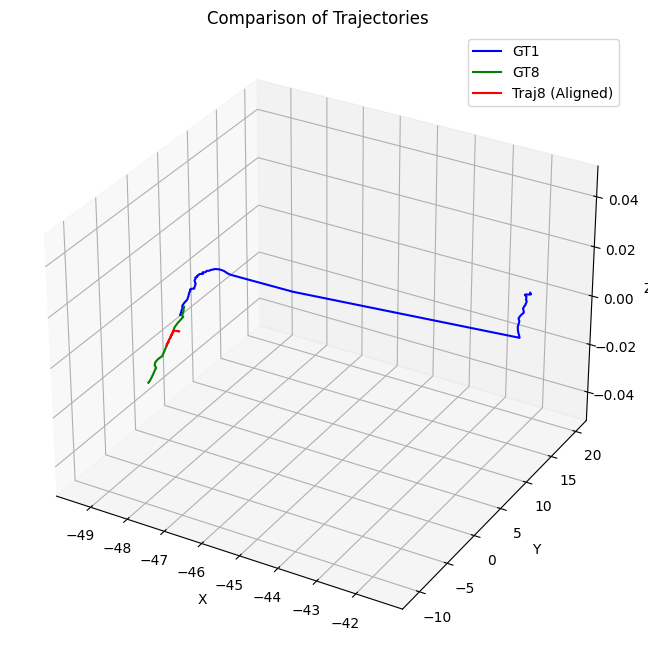

In [69]:
gt_positions1 = gt1[["px", "py", "pz"]].to_numpy()
traj_positions1 = traj1[["px", "py", "pz"]].to_numpy()
gt_positions8 = gt8[["px", "py", "pz"]].to_numpy()
traj_positions8 = traj8[["px", "py", "pz"]].to_numpy()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# ax.plot(traj1_positions[1600:4900, 0], traj1_positions[1600:4900, 1], traj1_positions[1600:4900, 2], label="Trajectory 1 (Reference)", color="blue")
ax.plot(gt_positions1[:, 0], gt_positions1[:, 1], label="GT1", color="blue")
ax.plot(gt_positions8[:, 0], gt_positions8[:, 1], label="GT8", color="green")

# ax.plot(traj_positions1[:, 0], traj_positions1[:, 1], label="Traj1 (Aligned)", color="red")
ax.plot(traj_positions8[:, 0], traj_positions8[:, 1], label="Traj8 (Aligned)", color="red")

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.set_xlim([-50, -40])  
# ax.set_ylim([-10, 20])  
# ax.set_zlim([0, 0.5]) 
ax.set_title("Comparison of Trajectories")
ax.legend()